# <mark>*Import all the tools*</mark> 

In [1496]:
!cp /content/drive/MyDrive/googleColabStuff/ColabStuff/Analyse_data_fonctions/fonctions.py /content/

In [1497]:
# python librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn preprocess functionnality
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
#from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
#sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#our data cleansing methode
from fonctions import *

# <mark>*Acquire clean data*</mark>

## *load data*

In [1498]:
dataset=sns.load_dataset('titanic')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1499]:
print(dataset.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [1500]:
data=dataset.drop(['class','who','deck','embark_town','alive'],axis=1)

## *Inspecting data*

In [1501]:
data.dtypes

survived        int64
pclass          int64
sex            object
age           float64
sibsp           int64
parch           int64
fare          float64
embarked       object
adult_male       bool
alone            bool
dtype: object

In [1502]:
data.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
adult_male      0
alone           0
dtype: int64

In [1503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [1504]:
#data[data.duplicated()]
data=data.drop_duplicates()

In [1505]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'alone'],
      dtype='object')

# Clean data

In [1506]:
data['sex'].replace({'male':1,'female':0},inplace=True)
data['adult_male']=data['adult_male'].astype('int')
data['alone']=data['alone'].astype('int')

In [1507]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,S,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,1


In [1508]:
find_outliers(data['age'])

(array([ 11,  33,  53,  90,  91, 110, 162, 186, 218, 237, 252, 258, 263,
        303, 336, 397, 414, 435, 438, 442, 487, 507, 523, 554, 559, 580,
        592, 603, 612, 656, 730, 747]),)

In [1509]:
#boxPlotAll(data)
#in the way of greatly interprete and deal with outliers you may need boxplot them

In [1510]:
IQR=data['age'].quantile(0.75)-data['age'].quantile(0.25)
lower=-(data['age'].quantile(0.25)-1.5*IQR)
higher=data['age'].quantile(0.75)+1.5*IQR
print(lower)
print(higher)

8.5
67.5


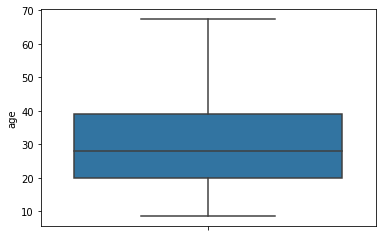

In [1511]:
data.loc[data['age']<lower,'age']=lower
data.loc[data['age']>higher,'age']=higher
sns.boxplot(y='age',data=data)

In [1512]:
IQR=data['fare'].quantile(0.75)-data['fare'].quantile(0.25)
lower=(data['fare'].quantile(0.25)-1.5*IQR)
higher=data['fare'].quantile(0.75)+1.5*IQR
print(lower)
print(higher)

-31.437499999999996
73.8625


In [1513]:
data.loc[data['fare']<lower,'fare']=lower
data.loc[data['fare']>higher,'fare']=higher

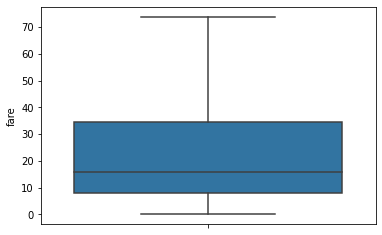

In [1514]:
sns.boxplot(y='fare',data=data)

In [1515]:
find_outliers(data[['fare']])

(array([], dtype=int64), array([], dtype=int64))

In [1516]:
#boxPlotAll(data)

In [1517]:
data.isnull().sum()

survived        0
pclass          0
sex             0
age           104
sibsp           0
parch           0
fare            0
embarked        2
adult_male      0
alone           0
dtype: int64

In [1518]:
means=data.mean().to_dict()
for m in means:
  data[m]=data[m].fillna(value=means[m])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [1519]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
adult_male    0
alone         0
dtype: int64

In [1520]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1521]:
data['embarked'].value_counts(normalize=True).sort_values()

Q    0.074550
C    0.199229
S    0.726221
Name: embarked, dtype: float64

In [1522]:
pd.crosstab(data['embarked'],data['embarked'])

embarked,C,Q,S
embarked,,,
C,155,0,0
Q,0,58,0
S,0,0,565


In [1523]:
data['embarked']=data['embarked'].fillna(value='S')

In [1524]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

# <mark>*Understand data*</mark>

# *Inspecting data*

In [1525]:
data.describe()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,0.625641,30.161982,0.525641,0.417949,26.652527,0.574359,0.566667
std,0.492657,0.854452,0.484267,12.936078,0.988046,0.838536,22.959236,0.494757,0.495854
min,0.000000,1.000000,0.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.750000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,30.161982,0.000000,0.000000,15.950000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.375000,1.000000,1.000000
max,1.000000,3.000000,1.000000,67.500000,8.000000,6.000000,73.862500,1.000000,1.000000


# Visualize data

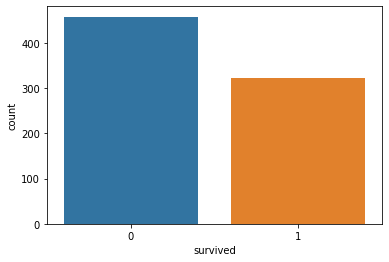

In [1526]:
sns.countplot(x='survived',data=data)
# we can oblivious see the difference that the number of woman that survived is greather than man 

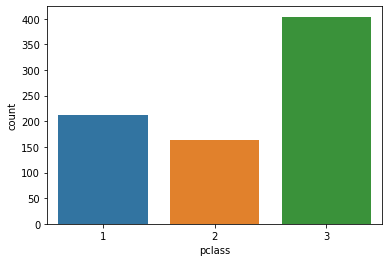

In [1527]:
sns.countplot(x='pclass',data=data)
# we litteraly say that the number of class C(3)(lowest expensive) ticket is greather than the other

In [ ]:
sns.countplot(x='sex',data=data)
#the number of man in the ship is greather than the number of man

In [ ]:
sns.countplot(x='sibsp',data=data)

In [ ]:
sns.countplot(x='parch',data=data)
#by looking those 2 features(siblings-parent & parent-child) which cross our mind is feature engineering

In [ ]:
sns.countplot(x='embarked',data=data)

In [ ]:
#correlationMatrix(data)
#from this we can say that the features like <family> and <Passenger> don't have a lot of correlation for our target feature(survived)

# Feature engineering

In [ ]:
data['family']=data['parch']+data['sibsp']
data.drop(['parch','sibsp'],axis=1,inplace=True)

In [ ]:
data.head(3)

In [ ]:
data['embarked'].unique()

In [ ]:
embarked_dummies=pd.get_dummies(data['embarked'],drop_first=True)
data=pd.concat([data,embarked_dummies],axis=1)
del data['embarked']
data.head(3)

# <mark>*Prepare data*</mark>

# *Select feature & Split data into Input and target data set*

In [ ]:
y=data['survived']
X=data.drop(['survived'],axis=1)
X.head(3)

In [ ]:
y.head(3)

In [ ]:
X.isnull().sum()

## *Scale features*

<em>we don't need to do that now because the models that we are going to use can handle this problem itself so we don't to do that
but we may come back to do it if our model doesn't give us a greater accuracy</em>
<p> check the pipeline part</p>

## *Split the input feature into train and test set*

Il est vraiment important de s'assurer que les donnees soit equitable et c'est l'argument stratify qui nous permet d'aboutir a cela

In [ ]:
#60% pour le train et 20% pour val et 20% pour test
seed=111

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=seed,stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)                                                

In [ ]:
y.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

## *Resampling*

In [ ]:
sns.countplot(x='survived',data=data)

In [ ]:
#1st method upsampling
X2=X_train
X2['survived']=y_train.values
minority=X2[X2.survived==1]
majority=X2[X2.survived==0]
print(X2.shape)
print("minority:",minority.shape)
print("majority:",majority.shape)

In [ ]:
#1st method upsampling
#we have to increase the minority class
#le parametre replace est utiliser pour le tirage avec remise
minority_sampled=resample(minority,replace=True,n_samples=len(majority))
upsampled=pd.concat([majority,minority_sampled],axis=0)

In [ ]:
upsampled['survived'].value_counts(normalize=True)

In [ ]:
upsampled.head(3)

In [ ]:
X_train_up=upsampled.drop('survived',axis=1)
y_train_up=upsampled['survived']

In [ ]:
#2nd methode downsampling
majority_downsampled=resample(majority,replace=False,n_samples=len(minority))
downsampled=pd.concat([minority,majority_downsampled],axis=0)

In [ ]:
X_train_down=downsampled.drop('survived',axis=1)
y_train_down=downsampled['survived']

In [ ]:
downsampled['survived'].value_counts(normalize=True)

# <mark>Build Model</mark>

# Select features

In [ ]:
kBest=SelectKBest(score_func=f_regression,k=7)
kBest.fit(X_train_up,y_train_up)
print('features score:',kBest.scores_)
print('Selected feature:',list(X.columns[kBest.get_support()]))
print('Removed features:',list(X.columns[~kBest.get_support()]))

X_train_up=kBest.transform(X_train_up)
X_test=kBest.transform(X_test)
X_train_up=pd.DataFrame(X_train_up)
y_train_up=pd.DataFrame(y_train_up)

# Pipeline for our models

In [ ]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)
# set advance pipeline
numerical_pip=make_pipeline(SimpleImputer(strategy='median'),MinMaxScaler(feature_range=(0,1)))
categorical_pip=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder)
preprocessor=make_column_transformer((numerical_pip,numerical_features),(categorical_pip,categorical_features))
preprocessor

## Build a basic model for selection or use of ACP

In [ ]:
model_base_rf=make_pipeline(preprocessor,RandomForestClassifier(random_state=seed))
#entrainer le model
model_base_rf.fit(X_train_up,y_train_up)

In [ ]:
model_base_rf.score(X_test,y_test)

In [ ]:
#from sklearn import set_config
#set_config(display='diagram')
#model_base_rf

## *Create computing models*

1st model:<mark>LogisticRegression</mark>

In [ ]:
lr=make_pipeline(preprocessor,LogisticRegression(random_state=seed,max_iter=500))
#recherche d'une bonne hyperparametre
lr_hyp={'C':[0.001,0.01,0.1,1,5,10,100]}
lr_cv=GridSearchCV(lr,lr_hyp,cv=5)
#lr_cv.fit(X_train_up,y_train_up)
#print(lr_cv.best_score_)        #precision
#print(lr_cv.best_estimator_)    #bne parameter

2nd model:<mark>RandomForestClassifier</mark>

In [ ]:
RF=make_pipeline(preprocessor,RandomForestClassifier(random_state=seed))
#look for greater parameter
RF_hyp={'n_estimators':[5,10,20,50,100,200],
       'max_depth':[None,2,5,10,15,20]}
RF_cv=GridSearchCV(RF,RF_hyp,cv=5)
RF_cv.fit(X_train_up,y_train_up)
#print(RF_cv.best_score_)
#print(RF_cv.best_estimator_)

3thd model:<mark>SVM model</mark>

In [ ]:
SVM=make_pipeline(preprocessor,SVC(random_state=seed))
#search for greater parameter
SVM_hyp={'C':[0.01,0.1,1,5,10],
        'kernel':['linear','rbf']}
SVM_cv=GridSearchCV(SVM,SVM_hyp,cv=5)
SVM_cv.fit(X_train_up,y_train_up)
#print(SVM_cv.best_score_)
#print(SVM_cv.best_estimator_)

4th model:<mark>Bagging classifier model</mark>

In [ ]:
#BC=BaggingClassifier(random_state=seed)
#search for greater parameter
#BC_hyp={'n_estimators':[5,10,15,20,50,100,200]}
#BC_cv=GridSearchCV(BC,BC_hyp,cv=5)
#BC_cv.fit(X_train_up,y_train_up)
#print(BC_cv.best_score_)
#print(BC_cv.best_estimator_)

In [ ]:
#KNN=KNeighborsClassifier()
#search for greater parameter
#KNN_hyp={'n_neighbors':np.arange(1,20),
#        'metric':['euclidean','manhattan']}
#KNN_cv=GridSearchCV(KNN,KNN_hyp,cv=5)
#KNN_cv.fit(X_train_up,y_train_up)
#print(KNN_cv.best_score_)
#print(KNN_cv.best_estimator_)

# <mark>*Evaluate Model*</mark>

In [ ]:
def best_model(model,features,labels):
    pred=model.predict(features)
    score=accuracy_score(labels,pred)
    print('Global score:',round(score,3)*100)

In [ ]:
#models=[lr_cv.best_estimator_,RF_cv.best_estimator_,SVM_cv.best_estimator_,BC_cv.best_estimator_,KNN_cv.best_estimator_]
#for model in models:
#    print('Model:'+str(model))
#    best_model(model , X_val , y_val)
#    print('-'*90)

## *Choose the model*

In [ ]:
#model=SVM_cv.best_estimator_

# Learning curve

In [ ]:
#N,train_score,val_score=learning_curve(model,X_train_up,y_train_up,train_sizes=np.linspace(0.1,1.0,10),cv=5)
#print(N)
#plt.plot(N,train_score.mean(axis=1),label='train learning curve')
#plt.plot(N,val_score.mean(axis=1),label='validation learning curve')
#plt.xlabel('train size')
#plt.legend()
#plt.show()

# Evaluate the performance of the model

In [ ]:
#score=accuracy_score(y_test,model.predict(X_test))
#print('Final Score:',round(score,3)*100)

# *Confusion matrix*

In [ ]:
#confusion_matrix(y_test,model.predict(X_test))